In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [51]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [52]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

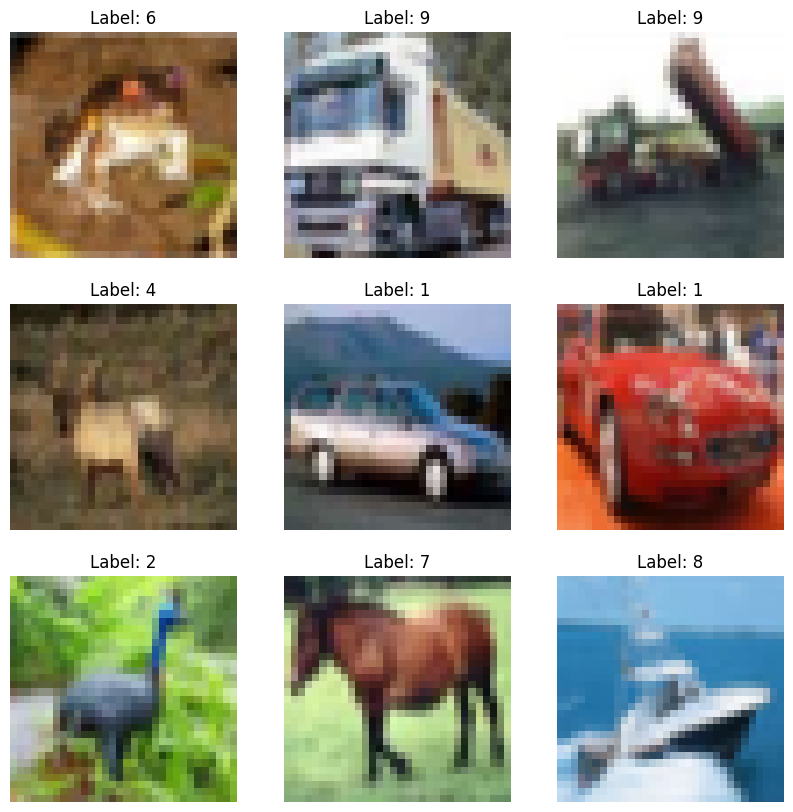

In [53]:
# Display sample images from the training dataset
def plot_sample_images():
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(x_train[i])
        plt.title(f"Label: {y_train[i][0]}")
        plt.axis('off')
    plt.show()

plot_sample_images()

In [54]:
# Build the CNN model
model = models.Sequential([
    # Convolutional layer 1
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    
    # Third Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    
    # Fully connected layer
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5), # Dropout layer to prevent overfitting
    
    # Output layer
    layers.Dense(10, activation='softmax')  # 10 classes in CIFAR-10
])

# Model summary to view the architecture
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 620,362 (2.37 MB)

 Trainable params: 620,362 (2.37 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [56]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# EarlyStopping to stop if validation loss doesn't improve for 3 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# ModelCheckpoint to save the best model
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(x_train, y_train, 
                    epochs=30,batch_size=64,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, model_checkpoint]
                   )

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.3289 - loss: 1.8129 - val_accuracy: 0.5585 - val_loss: 1.2504
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5621 - loss: 1.2323 - val_accuracy: 0.6503 - val_loss: 0.9888
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6417 - loss: 1.0224 - val_accuracy: 0.6927 - val_loss: 0.8865
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6876 - loss: 0.8912 - val_accuracy: 0.7018 - val_loss: 0.8560
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7155 - loss: 0.8097 - val_accuracy: 0.7197 - val_loss: 0.8091
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7430 - loss: 0.7364 - val_accuracy: 0.7315 - val_loss: 0.7778
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7556 - loss: 0.6879 - val_accuracy: 0.7384 - val_loss: 0.7577
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7834 - loss: 0.6129 - val_accuracy: 

In [11]:
from tensorflow.keras.models import load_model

best_model = load_model('best_model.keras')

# Evaluate the model
test_loss, test_acc = best_model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc}")

313/313 - 2s - 5ms/step - accuracy: 0.7578 - loss: 0.7098
Test Accuracy: 0.7577999830245972


# Using Data Augmentation

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10

In [13]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# Create an instance of ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,  # Randomly rotate images in the range (degrees)
    width_shift_range=0.1,  # Randomly shift images horizontally
    height_shift_range=0.1,  # Randomly shift images vertically
    shear_range=0.1,  # Shear transformations
    zoom_range=0.2,  # Zoom transformation
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Pixel filling for newly created pixels after transformations
)

In [5]:
# Fit the data generator on the training data
datagen.fit(x_train)

In [20]:
# Build the CNN model
model = models.Sequential([
    # Convolutional layer 1
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    
    # Third Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    
    # Fully connected layer
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5), # Dropout layer to prevent overfitting
    
    # Output layer
    layers.Dense(10, activation='softmax')  # 10 classes in CIFAR-10
])

# Model summary to view the architecture
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 620,362 (2.37 MB)

 Trainable params: 620,362 (2.37 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [22]:
# EarlyStopping to stop if validation loss doesn't improve for 3 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# ModelCheckpoint to save the best model
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Train the model with augmented data
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=30,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, model_checkpoint]
                   )

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 43ms/step - accuracy: 0.3041 - loss: 1.8765 - val_accuracy: 0.5163 - val_loss: 1.3067
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.4997 - loss: 1.3890 - val_accuracy: 0.5900 - val_loss: 1.1570
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5682 - loss: 1.2241 - val_accuracy: 0.6252 - val_loss: 1.0557
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.6034 - loss: 1.1234 - val_accuracy: 0.6775 - val_loss: 0.9087
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 37ms/step - accuracy: 0.6322 - loss: 1.0416 - val_accuracy: 0.6824 - val_loss: 0.9078
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.6507 - loss: 0.9952 - val_accuracy: 0.7142 - val_loss: 0.8335
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.6673 - loss: 0.9572 - val_accuracy: 0.7190 - val_loss: 0.8069
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.6818 - loss: 0.9165 - 

In [24]:
best_model = load_model('best_model.keras')

# Evaluate the model on the test set
test_loss, test_acc = best_model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7603 - loss: 0.6972
Test accuracy: 0.7602999806404114


# Fine tuning a ResNet50

In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize the images to range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers in the base model to retain learned features
base_model.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')  # CIFAR-10 has 10 classes
])

In [7]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 52ms/step - accuracy: 0.1843 - loss: 2.2329 - val_accuracy: 0.2892 - val_loss: 1.9285
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.2735 - loss: 1.9854 - val_accuracy: 0.3369 - val_loss: 1.8556
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.2918 - loss: 1.9436 - val_accuracy: 0.3375 - val_loss: 1.8648
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.3037 - loss: 1.9169 - val_accuracy: 0.3612 - val_loss: 1.7890
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.3190 - loss: 1.8900 - val_accuracy: 0.3591 - val_loss: 1.7909
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.3232 - loss: 1.8738 - val_accuracy: 0.3331 - val_loss: 1.8386
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.3247 - loss: 1.8719 - val_accuracy: 0.3756 - val_loss: 1.7477
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.3263 - loss: 1.8641 - val_accurac

In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# EarlyStopping to stop if validation loss doesn't improve for 3 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

base_model.trainable = True

# Compile the model again to apply the changes
model.compile(optimizer=Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=20, validation_data=(x_test, y_test),callbacks = early_stopping)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 104s 72ms/step - accuracy: 0.1664 - loss: 5.4451 - val_accuracy: 0.1315 - val_loss: 16.6566
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.2942 - loss: 2.2283 - val_accuracy: 0.3852 - val_loss: 3.1269
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.3846 - loss: 1.7958 - val_accuracy: 0.4665 - val_loss: 1.9635
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.4543 - loss: 1.5782 - val_accuracy: 0.5193 - val_loss: 1.5893
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.5032 - loss: 1.4337 - val_accuracy: 0.5646 - val_loss: 1.3891
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.5503 - loss: 1.2931 - val_accuracy: 0.6010 - val_loss: 1.2336
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.5797 - loss: 1.2037 - val_accuracy: 0.6289 - val_loss: 1.1092
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.6137 - loss: 1.1106 

In [14]:
model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=10, validation_data=(x_test, y_test),callbacks = early_stopping)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.7739 - loss: 0.6489 - val_accuracy: 0.7766 - val_loss: 0.6897
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.7816 - loss: 0.6238 - val_accuracy: 0.7789 - val_loss: 0.7482
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.7868 - loss: 0.6106 - val_accuracy: 0.7761 - val_loss: 0.7214
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.7918 - loss: 0.5913 - val_accuracy: 0.7826 - val_loss: 0.7070


In [15]:
model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=10, validation_data=(x_test, y_test),callbacks = early_stopping)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.7796 - loss: 0.6293 - val_accuracy: 0.7759 - val_loss: 0.7128
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.7824 - loss: 0.6171 - val_accuracy: 0.7817 - val_loss: 0.6644
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.7923 - loss: 0.5956 - val_accuracy: 0.7841 - val_loss: 0.7213
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.7944 - loss: 0.5808 - val_accuracy: 0.7873 - val_loss: 0.7256
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.8003 - loss: 0.5698 - val_accuracy: 0.7896 - val_loss: 0.7792


In [16]:
# Compile the model again to apply the changes
model.compile(optimizer=Adam(learning_rate=1e-6), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=10, validation_data=(x_test, y_test),callbacks = early_stopping)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 96s 68ms/step - accuracy: 0.7908 - loss: 0.5946 - val_accuracy: 0.7825 - val_loss: 0.7290
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.7935 - loss: 0.5866 - val_accuracy: 0.7858 - val_loss: 0.6893
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.7932 - loss: 0.5875 - val_accuracy: 0.7848 - val_loss: 0.7042


In [18]:
# EarlyStopping to stop if validation loss doesn't improve for 3 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [19]:
model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=15, validation_data=(x_test, y_test),callbacks = early_stopping)

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.7952 - loss: 0.5793 - val_accuracy: 0.7813 - val_loss: 0.7554
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.7981 - loss: 0.5817 - val_accuracy: 0.7840 - val_loss: 0.7247
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.7946 - loss: 0.5845 - val_accuracy: 0.7841 - val_loss: 0.7230
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.7949 - loss: 0.5851 - val_accuracy: 0.7852 - val_loss: 0.7155
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.8003 - loss: 0.5690 - val_accuracy: 0.7854 - val_loss: 0.7122
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.8006 - loss: 0.5655 - val_accuracy: 0.7857 - val_loss: 0.7147
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.8019 - loss: 0.5690 - val_accuracy: 0.7855 - val_loss: 0.6973
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.8000 - loss: 0.5723 - 

## Using SGD optimizer

In [19]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10

In [20]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [21]:
# Fit the data generator on the training data
datagen.fit(x_train)

In [23]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers of the base model to retain learned features
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # CIFAR-10 has 10 classes
])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [24]:
# Compile the model with SGD optimizer and the initial learning rate
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [25]:
# Train the model (example using training and validation datasets)
# Train the model
model.fit(
    datagen.flow(x_train, y_train, batch_size=64), 
    epochs=10,
    validation_data=(x_test, y_test)
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 50ms/step - accuracy: 0.1021 - loss: 2.4015 - val_accuracy: 0.0998 - val_loss: 2.3025
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.1006 - loss: 2.3026 - val_accuracy: 0.1001 - val_loss: 2.3026
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.0946 - loss: 2.3026 - val_accuracy: 0.1001 - val_loss: 2.3026
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.0968 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.0996 - loss: 2.3026 - val_accuracy: 0.0998 - val_loss: 2.3026
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.0990 - loss: 2.3026 - val_accuracy: 0.1003 - val_loss: 2.3026


In [26]:
from tensorflow.keras.callbacks import EarlyStopping

base_model.trainable = True

# Compile the model again to apply the changes
model.compile(optimizer=SGD(learning_rate=0.0001,momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [27]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 65ms/step - accuracy: 0.1503 - loss: 2.8748 - val_accuracy: 0.1695 - val_loss: 4.4471
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.3420 - loss: 1.8781 - val_accuracy: 0.5057 - val_loss: 1.4641
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.4605 - loss: 1.5621 - val_accuracy: 0.5529 - val_loss: 1.3353
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.5209 - loss: 1.3933 - val_accuracy: 0.6193 - val_loss: 1.1355
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.5633 - loss: 1.2842 - val_accuracy: 0.6490 - val_loss: 1.0566
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.5946 - loss: 1.2011 - val_accuracy: 0.6720 - val_loss: 0.9944
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.6173 - loss: 1.1245 - val_accuracy: 0.6728 - val_loss: 0.9949
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.6383 - loss: 1.0789 - 

In [28]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.6725 - loss: 0.9687 - val_accuracy: 0.7245 - val_loss: 0.8457
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.6873 - loss: 0.9354 - val_accuracy: 0.7312 - val_loss: 0.7873
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.6890 - loss: 0.9232 - val_accuracy: 0.7379 - val_loss: 0.7676
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.7041 - loss: 0.8959 - val_accuracy: 0.7461 - val_loss: 0.7475
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.7048 - loss: 0.8777 - val_accuracy: 0.7466 - val_loss: 0.7432


In [ ]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=10, validation_data=(x_test, y_test))

# New Method

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [48]:
# Load ResNet-50 with ImageNet weights (excluding top layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model initially
base_model.trainable = False

In [53]:
# Create the model
inputs = layers.Input(shape=(32, 32, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs, outputs)

In [54]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
# Train only the top layers
history = model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 52ms/step - accuracy: 0.1056 - loss: 2.4003 - val_accuracy: 0.1597 - val_loss: 2.2609
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.1264 - loss: 2.2795 - val_accuracy: 0.1564 - val_loss: 2.2617
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.1306 - loss: 2.2681 - val_accuracy: 0.1736 - val_loss: 2.2325
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.1261 - loss: 2.2605 - val_accuracy: 0.1641 - val_loss: 2.2353
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.1300 - loss: 2.2558 - val_accuracy: 0.1734 - val_loss: 2.2014
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.1326 - loss: 2.2541 - val_accuracy: 0.1661 - val_loss: 2.2174
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.1297 - loss: 2.2530 - val_accuracy: 0.1693 - val_loss: 2.2013
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.1276 - loss: 2.2544 - 

In [56]:
# Unfreeze the entire base model for full fine-tuning
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [57]:
# Fine-tune the entire model
history_fine = model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=4, validation_data=(x_test, y_test))

Epoch 1/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 104s 74ms/step - accuracy: 0.3085 - loss: 2.2241 - val_accuracy: 0.2801 - val_loss: 2.4993
Epoch 2/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.6312 - loss: 1.1032 - val_accuracy: 0.7206 - val_loss: 0.8320
Epoch 3/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.6951 - loss: 0.9085 - val_accuracy: 0.7646 - val_loss: 0.7082
Epoch 4/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.7367 - loss: 0.7878 - val_accuracy: 0.7599 - val_loss: 0.7157


In [58]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [59]:
# Fine-tune the entire model
history_fine1 = model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 103s 73ms/step - accuracy: 0.7575 - loss: 0.7223 - val_accuracy: 0.7938 - val_loss: 0.6077
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.7712 - loss: 0.6711 - val_accuracy: 0.8059 - val_loss: 0.5721
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.7780 - loss: 0.6491 - val_accuracy: 0.8048 - val_loss: 0.5776
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.7925 - loss: 0.6112 - val_accuracy: 0.8110 - val_loss: 0.5684
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.7929 - loss: 0.6075 - val_accuracy: 0.8140 - val_loss: 0.5587
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.8008 - loss: 0.5811 - val_accuracy: 0.8158 - val_loss: 0.5589
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.8020 - loss: 0.5761 - val_accuracy: 0.8123 - val_loss: 0.5611
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.8100 - loss: 0.5537 -

In [61]:
model.save('fine_tuned_RESNET50.keras')

In [63]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.000001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [64]:
from tensorflow.keras.callbacks import EarlyStopping
# EarlyStopping to stop if validation loss doesn't improve for 10 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [66]:
history_fine2 = model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=30, validation_data=(x_test, y_test),callbacks = early_stopping)

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 74ms/step - accuracy: 0.8239 - loss: 0.5176 - val_accuracy: 0.8227 - val_loss: 0.5371
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.8217 - loss: 0.5205 - val_accuracy: 0.8246 - val_loss: 0.5337
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.8219 - loss: 0.5221 - val_accuracy: 0.8230 - val_loss: 0.5350
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.8276 - loss: 0.5022 - val_accuracy: 0.8240 - val_loss: 0.5339
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.8189 - loss: 0.5230 - val_accuracy: 0.8229 - val_loss: 0.5344
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.8257 - loss: 0.5066 - val_accuracy: 0.8234 - val_loss: 0.5331
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.8257 - loss: 0.5085 - val_accuracy: 0.8258 - val_loss: 0.5274
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.8271 - loss: 0.5032 - 

In [67]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8288 - loss: 0.5242
Test Accuracy: 0.8307


In [13]:
# import tf_keras as k3

# model = k3.models.load_model('/kaggle/input/fine-tuned-resnet50/keras/default/1')
model = tf.keras.models.load_model('/kaggle/input/fine-tuned-resnet50/keras/default/1/fine_tuned_RESNET50.keras')

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Fine-tune the entire model
history_fine1 = model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 102s 74ms/step - accuracy: 0.8142 - loss: 0.5361 - val_accuracy: 0.8299 - val_loss: 0.5197
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.8251 - loss: 0.5020 - val_accuracy: 0.8250 - val_loss: 0.5290
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.8278 - loss: 0.5010 - val_accuracy: 0.8281 - val_loss: 0.5261
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.8313 - loss: 0.4941 - val_accuracy: 0.8298 - val_loss: 0.5189
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.8330 - loss: 0.4840 - val_accuracy: 0.8322 - val_loss: 0.5156
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.8377 - loss: 0.4768 - val_accuracy: 0.8321 - val_loss: 0.5155
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.8416 - loss: 0.4615 - val_accuracy: 0.8336 - val_loss: 0.5112
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.8491 - loss: 0.4423 -

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.000001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# Fine-tune the entire model
history_fine1 = model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 99s 70ms/step - accuracy: 0.8518 - loss: 0.4324 - val_accuracy: 0.8345 - val_loss: 0.5109
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.8509 - loss: 0.4283 - val_accuracy: 0.8356 - val_loss: 0.5066
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.8560 - loss: 0.4161 - val_accuracy: 0.8365 - val_loss: 0.5076
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.8574 - loss: 0.4164 - val_accuracy: 0.8366 - val_loss: 0.5050
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.8574 - loss: 0.4116 - val_accuracy: 0.8359 - val_loss: 0.5060
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.8562 - loss: 0.4188 - val_accuracy: 0.8371 - val_loss: 0.5059
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.8589 - loss: 0.4077 - val_accuracy: 0.8368 - val_loss: 0.5078
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.8603 - loss: 0.4119 - 

In [18]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8322 - loss: 0.5184
Test Accuracy: 0.8373


# Results

|Metrics| CNN| CNN + Data Augmentation| Finetuned-Resnet50 (Adam Optimizer)| Finetuned-Resnet50 (SGD Optimizer) | 
|--|--|--|--|--|
|Test Accuracy| 0.75779| 0.76029| 0.8386| -|